<a href="https://colab.research.google.com/github/NeuralClassifier/ReusabilityRate_ML/blob/main/SelectingTheBestModel_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn==1.0.1
!pip install -U tensorflow==2.7.0
!pip install -U seaborn==0.11.2
!pip install -U matplotlib==3.5.0
!pip install -U pandas==1.3.4

In [1]:
import numpy as np
import pandas as pd
import warnings
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
warnings.filterwarnings('ignore')
class SelectBest:
  def __init__(self,dfname):
    if dfname.lower() == 'class':
      self.df = pd.read_excel('Results/ClassLevelPred_classifier.xlsx')
      self.df.drop(['Unnamed: 0'],axis =1, inplace=True)
      self.list_of_metrics = list(self.df['Metric'].unique())
      self.level='class'
    elif dfname.lower() == 'package':

      self.df = pd.read_excel('Results/PackageLevelPred_classifier.xlsx')
      self.df.drop(['Unnamed: 0'],axis =1, inplace=True)
      self.list_of_metrics = list(self.df['Metric'].unique())
      self.level='package'
    else:
      print('wrong input!! Try again :)')

  def best_model(self,metrics):

    #if dfname.lower() == 'class':
      #df = pd.read_excel('Results/classRes_TraditionalModels.xlsx')
      #df.drop(['Unnamed: 0'],axis =1, inplace=True)
      #list_of_metrics = list(df['Metric'].unique())
      
    if metrics.lower() == 'accuracy':
  
      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.Acc == df_temp.Acc.max()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['Accuracy',i,bestModel])

      return best_model

    elif metrics.lower() == 'precision':

      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.Pre == df_temp.Pre.max()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['Precision',i,bestModel])

      return best_model
    
    elif metrics.lower() == 'recall':

      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.Rec == df_temp.Rec.max()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['Recall',i,bestModel])

      return best_model

    else:
      print('wrong input!! Try again :)')

    #elif dfname.lower() == 'package':

      #df = pd.read_excel('Results/packageRes_TraditionalModels.xlsx')
      #df.drop(['Unnamed: 0'],axis =1, inplace=True)
      #list_of_metrics = list(df['Metric'].unique())

    if metrics.lower() == 'accuracy':
  
      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.Acc == df_temp.Acc.max()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['Accuracy',i,bestModel])

      return best_model

    elif metrics.lower() == 'precision':

      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.Pre == df_temp.Pre.max()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['Precision',i,bestModel])

      return best_model
    
    elif metrics.lower() == 'recall':

      best_model = []
      for i in self.list_of_metrics:
        df_temp = self.df[self.df['Metric']==i]
        best_idx = df_temp[df_temp.Rec == df_temp.Rec.max()].index[0]
        bestModel = self.df.iloc[best_idx,2]
        best_model.append(['Recall',i,bestModel])

      return best_model
      
    else:
      print('wrong input!! Try again :)')

      #return list_of_metrics

    #else:
      #print('wrong input!! Try again :)')
  def best_metric(self,measure):
    avg_score = []
    for i in self.list_of_metrics:
      df_temp = self.df[self.df['Metric']==i]
      avg = df_temp.Acc.mean()
      avg_score.append([i,avg])
    #return min(avg_score)
    avg_score = np.array(avg_score)
    metric_name=''
    max_value=0
    for i in avg_score:
      if float(i[1])>max_value:
        metric_name = i[0]
        max_value = float(i[1])
    print('Best Metric: ', metric_name, 'Avg Score: ', max_value)
    #return avg_score
    choice_to_show = input('You want to see the average scores for each metric (Y/N): ')
    if choice_to_show.lower() == 'y':
      print(avg_score)
  
  def plot_best_model(self,metric):
    
    D = self.best_model(metric)
    D = list(np.array(D)[:,2])
    D = Counter(D)
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    #plt.savefig('BestModel_Plots/bestModels_'+self.level.lower()+'Level_'+metric+'.png')
    plt.show()

In [12]:
sb = SelectBest('Class')
svg_arr=sb.best_metric('accuracy')

Best Metric:  LLOC Avg Score:  0.8188572862854427
You want to see the average scores for each metric (Y/N): Y
[['LCOM5' '0.8184390615037281']
 ['NL' '0.8184991834636755']
 ['NLE' '0.818040404315606']
 ['WMC' '0.8185348398320081']
 ['CBO' '0.8186205212494632']
 ['CBOI' '0.8180154914182358']
 ['NII' '0.8185146317779022']
 ['NOI' '0.8180255070007418']
 ['RFC' '0.8185795907396323']
 ['AD' '0.8183835589923096']
 ['CD' '0.8188271358443181']
 ['TCD' '0.8184289950910226']
 ['CLOC' '0.8185900739599735']
 ['TCLOC' '0.8180558261981288']
 ['DLOC' '0.8179749512843368']
 ['PDA' '0.8182776674875405']
 ['DIT' '0.8180202653905712']
 ['LLOC' '0.8188572862854427']
 ['LOC' '0.818262497722807']
 ['TLOC' '0.8178489452530286']
 ['NG' '0.8184188148186703']
 ['TLLOC' '0.8186507387864513']
 ['TNA' '0.8186205436147509']
 ['TNG' '0.8184842841156033']
 ['TNM' '0.8180408109572017']
 ['TNOS' '0.8181919230406381']
 ['TNPM' '0.8184189530768131']]


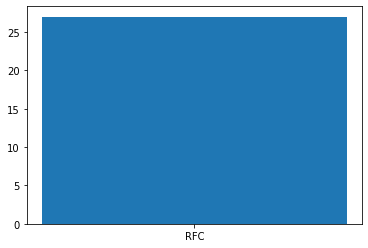

In [10]:
sb.plot_best_model('accuracy')

In [ ]:
}